In [36]:
# import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Doc du lieu
df = pd.read_csv("./data.csv")
df.head()

Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1

In [17]:
# Xem classficiton
df['Classification'].value_counts()
df['Classification'] = df['Classification'] - 1

In [38]:
df['Classification'].value_counts()

Classification
2    64
1    52
Name: count, dtype: int64

In [19]:
# Tạo dữ liệu để train model

y = df['Classification'].values.reshape(-1,1)

X = df.drop(columns=['Classification'])



In [20]:
print(X.shape)
print(y.shape)

(116, 9)
(116, 1)


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.1)

In [8]:
# Xay dung cay
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

my_tree = DecisionTreeClassifier(splitter='random')
my_tree.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [51]:
# Du doan tren du lieu test
y_pred = my_tree.predict(X_test)

# Tinh toan confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[7 2]
 [1 2]]


In [54]:
plot_confusion_matrix(my_tree, X_test, y_test)

NameError: name 'plot_confusion_matrix' is not defined

In [27]:
df = pd.read_csv("/content/datareg.csv")
df.head()

Product  Cost  Profit
0     'Asset Flip'   100    1000
1     'Text Based'   500    3000
2   'Visual Novel'  1500    5000
3   '2D Pixel Art'  3500    8000
4  '2D Vector Art'  5000    6500

In [28]:
# Tạo dữ liệu

X = df['Cost'].values.reshape(-1,1)
y= df['Profit'].values.reshape(-1,1)

In [30]:
from sklearn.tree import DecisionTreeRegressor

my_tree = DecisionTreeRegressor()
my_tree.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [31]:
X_test = [[4500]]

y_pred = my_tree.predict(X_test)
print(y_pred)

[6500.]


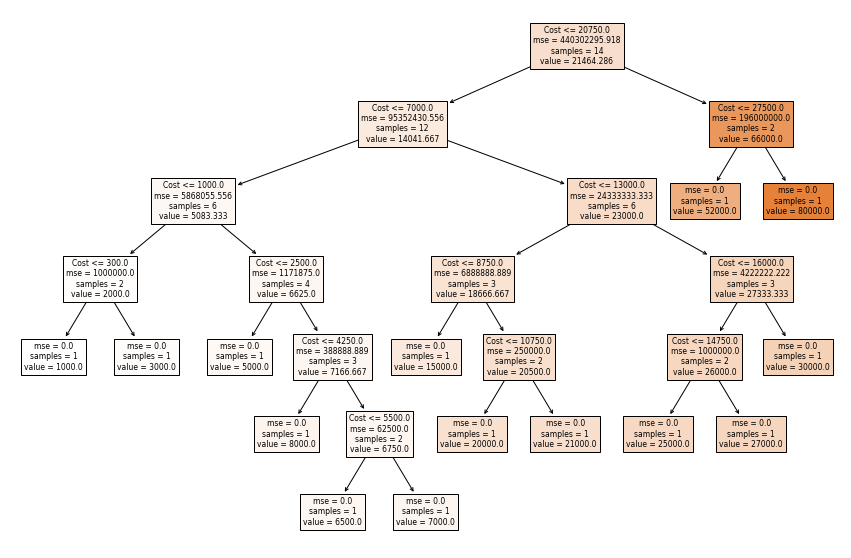

In [36]:
from sklearn import tree
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(my_tree, feature_names=['Cost'], class_names=['Profit'], filled=True)